<a href="https://colab.research.google.com/github/mesjou/machine-intelligence/blob/main/Exercise_09_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**H1)**

a) wurde schon in der VL gezeigt? oder übersehe ich da was (Slide 8)

b) primal problem:
\begin{align*}
&\min_{w, b,\phi_α} \frac{1}{2}||w||+\frac{C}{p}\sum_{α=1}^p \phi_\alpha \\
&\text{s.t.: } \\
& 1-\phi_\alpha-y_T^\alpha(w^Tx^\alpha+b)\leq 0\\
& -\phi_\alpha \leq 0
\end{align*}
Bilde Lagrangian:
\begin{align*}
L=\frac{1}{2}||w||+\frac{C}{p}\sum_{α}\phi_\alpha -\sum_\alpha \mu_\alpha \phi_\alpha + \sum_\alpha \lambda_\alpha (1-\phi_\alpha -y_T^\alpha(w^Tx^\alpha +b))
\end{align*}
wobei $\mu_\alpha \geq 0$ und $\lambda_\alpha \geq 0$.

**Schritt 1:** Minimiere $L$ nach $w$, $b$ und $\phi_\alpha$: ableiten und Ableitung =0 setzen

\begin{align*}
\frac{\partial L}{\partial w_i}=0 
&\implies w_i=\sum_\alpha \lambda_\alpha y_T^\alpha x_i^\alpha \\
&\implies w= \sum_\alpha \lambda_\alpha y_T^\alpha x^\alpha
\end{align*}

\begin{align*}
\frac{\partial L}{\partial \phi_\alpha}=0 
&\implies \frac{C}{p}-\mu_\alpha -\lambda_\alpha =0 \\
&\implies \mu_\alpha=\frac{C}{p}-\lambda_\alpha
\end{align*}

Mit $\mu_\alpha \geq 0$ folgt daraus $\lambda_\alpha \leq \frac{C}{p}$. 

\begin{align*}
\frac{\partial L}{\partial b}=0 \implies \sum_\alpha \lambda_\alpha y_T^\alpha =0
\end{align*}
**Schritt 2:** Bevor wir $L$ nach $\lambda_\alpha$ maximieren, schreiben wir die Gleichung ein bisschen um:
\begin{align*}
L&=\frac{1}{2}||w||+\frac{C}{p}\sum_{α}\phi_\alpha -\sum_\alpha \mu_\alpha \phi_\alpha + \sum_\alpha \lambda_\alpha (1-\phi_\alpha -y_T^\alpha(w^Tx^\alpha +b)) \\
&=\frac{1}{2}w^Tw+\frac{C}{p}\sum_{α}\phi_\alpha -\sum_\alpha (\frac{C}{p}-\lambda_\alpha)\phi_\alpha + \sum_\alpha \lambda_\alpha -\sum_\alpha \lambda_\alpha \phi_\alpha \\
&-\sum_\alpha \lambda_\alpha y_T^\alpha w^Tx^\alpha -\sum_\alpha \lambda_\alpha y_T^\alpha b \\
&= \frac{1}{2}w^Tw+ \sum_\alpha \lambda_\alpha -w^T \sum_\alpha \lambda_\alpha y_T^\alpha x^\alpha -b \sum_\alpha \lambda_\alpha y_T^\alpha \\
&= \frac{1}{2}w^Tw+ \sum_\alpha \lambda_\alpha -w^T w \\
&= - \frac{1}{2}w^Tw+ \sum_\alpha \lambda_\alpha 
\end{align*}
Nun setzen wir wieder $w= \sum_\alpha \lambda_\alpha y_T^\alpha x^\alpha$ ein und erhalten:
\begin{align*}
L &= - \frac{1}{2}w^Tw+ \sum_\alpha \lambda_\alpha \\
&= - \frac{1}{2} \sum_\alpha \sum_\beta \lambda_\alpha \lambda_\beta y_T^\alpha y_T^\beta (x^\alpha)^T x^\beta + \sum_\alpha \lambda_\alpha
\end{align*}
**Schritt 3:** Das Maximierungsproblem lautet also
\begin{align*}
&\max_{\lambda_\alpha} - \frac{1}{2} \sum_\alpha \sum_\beta \lambda_\alpha \lambda_\beta y_T^\alpha y_T^\beta (x^\alpha)^T x^\beta + \sum_\alpha \lambda_\alpha \\
&\text{s.t.} \\
&0\leq \lambda_\alpha \leq \frac{C}{p} \\
&\sum_\alpha \lambda_\alpha y_T^\alpha =0
\end{align*}

**H2)**

In [ ]:
!pip install libsvm

     |████████████████████████████████| 170 kB 5.4 MB/s 
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp37-cp37m-linux_x86_64.whl size=233363 sha256=ca03a5e08d1dbb7c7c263e10ab44e4b1c18103a69e414ee8f48911de7b9a0ac5
  Stored in directory: /root/.cache/pip/wheels/cd/e8/1e/bf95cf256e4d3ffc94289ab508c49d48e34c98220af63e3513
Successfully built libsvm


In [ ]:
import numpy as np
from math import log
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import libsvm #even needed?
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

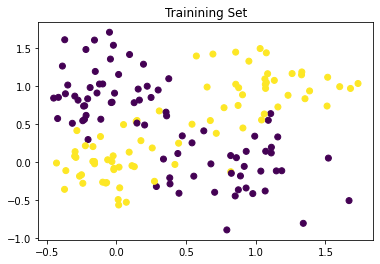

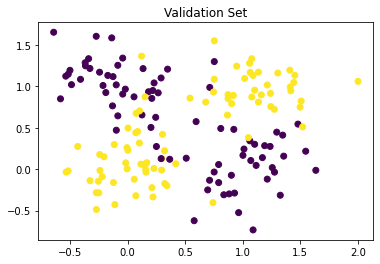

In [ ]:
#generate data
#1. training data
sigma = np.array([[0.1,0],[0,0.1]])
mu1 = np.array([0,1])
mu2 = np.array([1,0])
mu3 = np.array([0,0])
mu4 = np.array([1,1])
n = 160
np.random.seed(0)

w = np.random.randint(2, size=n)

X_mu1 = np.random.multivariate_normal(mu1, sigma, n)
X_mu2 = np.random.multivariate_normal(mu2, sigma, n)

X1 = np.empty(shape=(n, 2))
X1[w==1, :] = X_mu1[w==1, :]
X1[w==0, :] = X_mu2[w==0, :]

X_mu3 = np.random.multivariate_normal(mu3, sigma, n)
X_mu4 = np.random.multivariate_normal(mu4, sigma, n)

X2 = np.empty(shape=(n, 2))
X2[w==1, :] = X_mu3[w==1, :]
X2[w==0, :] = X_mu4[w==0, :]

X = np.append(X1,X2, axis=0)
Y = np.append(-1 * np.ones(n), np.ones(n))

#scale data?

# split data into training and hold-out sets
X_train, X_validate, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=101)

#plot
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)
plt.title("Trainining Set")
plt.show()

plt.scatter(X_validate[:,0], X_validate[:,1], c=Y_test)
plt.title("Validation Set")
plt.show()

In [ ]:
svm_model = SVC()
svm_model.fit(X_train,Y_train)

y_pred = svm_model.predict(X_validate)
print(1 - accuracy_score(y_pred,Y_test))

0.125


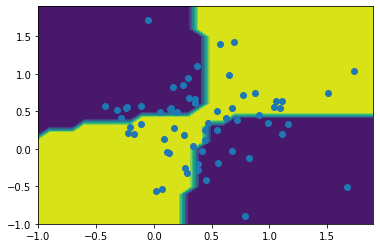

In [ ]:
#to visualize classification boundary construct query points
#testing data
x1_axis, x2_axis = np.meshgrid(np.arange(-1,2,0.1),np.arange(-1,2,0.1))
query_points=np.c_[x1_axis.ravel(), x2_axis.ravel()]
n=query_points.shape[0]

#plot classification boundary
Z=svm_model.predict(np.c_[x1_axis.ravel(), x2_axis.ravel()])
Z=Z.reshape(x1_axis.shape)
fig=plt.subplot()
fig.contourf(x1_axis, x2_axis, Z)
fig.scatter(svm_model.support_vectors_[:,0], svm_model.support_vectors_[:,1])

Sind anscheinend sehr viele Support Vectors?

In [ ]:
svm_model.n_support_

array([33, 32], dtype=int32)

**H3)** Grid search

In [ ]:
exponentials=np.arange(-6,10,1,dtype=float)
Cs=[2**x for x in exponentials]
gammas=[2**x for x in exponentials]

#gammas=np.arange(1,3)

accuracy=[]
#for each value of C and gamma fit the model and do cross-validation on training set 
for C in Cs:
  for gamma in gammas:
    svm_model=SVC(C=C, gamma=gamma)
    scores = cross_val_score(svm_model, X_train, Y_train, cv=10)
    mean_accuracy=np.mean(scores)
    accuracy=np.append(accuracy,mean_accuracy)

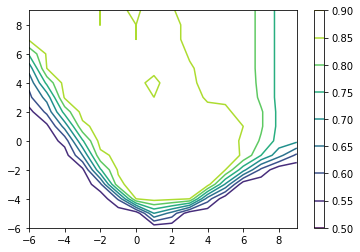

In [ ]:
#plotting
accuracy=accuracy.reshape((len(Cs), len(gammas)))

#convert axis to log scale
Cs_scaled=[log(x,2) for x in Cs]
gammas_scaled=[log(x,2) for x in gammas]

plt.contour(gammas_scaled,Cs_scaled,accuracy)
plt.colorbar()

In [ ]:
#find parameters C and gamma that maximize accuracy
print(np.max(accuracy))
max_param=np.unravel_index(np.argmax(accuracy), np.array(accuracy).shape)
print(max_param)
C_max=Cs[max_param[0]]
gamma_max=gammas[max_param[1]]
print(C_max, gamma_max)

0.8875
(7, 6)
2.0 1.0


In [ ]:
#retrain model with parameters from grid search and evaluate on validation set
#almost the same as before??
svm_model=SVC(C=C_max, gamma=gamma_max)
svm_model.fit(X_train,Y_train)
y_pred=svm_model.predict(X_validate)
print(1-accuracy_score(y_pred,Y_test))
print(svm_model.n_support_)

0.125
[29 30]


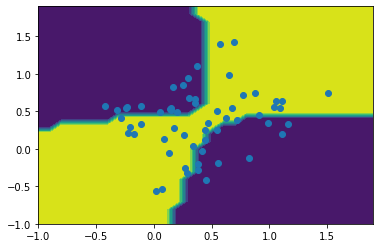

In [ ]:
#plot decision boundary
#plot classification boundary
Z=svm_model.predict(np.c_[x1_axis.ravel(), x2_axis.ravel()])
Z=Z.reshape(x1_axis.shape)
fig=plt.subplot()
fig.contourf(x1_axis, x2_axis, Z)
fig.scatter(svm_model.support_vectors_[:,0], svm_model.support_vectors_[:,1])

In [ ]:
svm_model=SVC(C=C_max, gamma=gamma_max/4)
svm_model.fit(X_train,Y_train)
y_pred=svm_model.predict(X_validate)
print(1-accuracy_score(y_pred,Y_test))
print(svm_model.n_support_)

0.11875000000000002
[46 47]
